In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import math
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
 from sklearn import linear_model

In [8]:
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.09 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.10 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.11 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.12 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001    #learning rating for updation of weight (alpha)
alpha = 0.0001    #lambda=alpha
N = len(X_train)

In [11]:
def sigmoid(w,x,b):
    z=np.dot(x,w)+b
    den=1+np.exp(-z)
    return 1/den

In [12]:
def logloss(w,b,X,Y):
    leng=len(X)
    loss=0
    for i in range(leng):
        sigma=sigmoid(w,X[i],b)
        loss+=-Y[i]*math.log(sigma)-(1-Y[i])*math.log(1-sigma)
    return loss/leng

In [13]:
#initial log loss for train and test data
currloss_train=logloss(w,b,X_train,y_train)
currloss_test=logloss(w,b,X_test,y_test)
list=[]
list.append(currloss_train)
list.append(currloss_test)
print("intial log loss for train data {}".format(list[0]))
print("intial log loss for test data {}".format(list[1]))

intial log loss for train data 0.6931471805594285
intial log loss for test data 0.6931471805600672


In [14]:

lr=eta0 #learning rate
lam=alpha #lambda
epoch=20 #no of iterations
logloss_train=[]
logloss_test=[]
index=np.arange(N)
np.random.shuffle(index)  #shuffling indices of train data
for i in range(1,epoch):  #for every epoch
    for j in index:
        X_r=X_train[j] #X_train datapoints batch size of 1
        Y_r=y_train[j]  #y_train datapoints batchsize 1
        
        gradient=(X_r*(sigmoid(w,X_r,b)-Y_r))+((lam*w)/N) #gradient of loss w.r.t w
        gradient_intercept=(sigmoid(w,X_r,b)-Y_r)  #gradient of intercept w.r.t b
        
        coeff=w-lr*gradient  #updating weight vector (wt1=wt-lr*gradient)
        intercept=b-lr*gradient_intercept  #updating intecept (bt1=bt=lr*gradientintercept)
     
        w=coeff  #storing wt=wt1 for next iteration
        b=intercept #storing bt=bt1 for next iteration
    prevloss_train=currloss_train
    prevloss_test=currloss_test
    
    currloss_train=logloss(coeff,intercept,X_train,y_train) #log loss for trian data with updated weight vector and intercept
    currloss_test=logloss(coeff,intercept,X_test,y_test) #log loss for test data with updated weight vector and intercept
    
    if round(currloss_train,4)==round(prevloss_train,4): #comparing previousloss and currentloss
        epoch_value=i
        print("training stoped at epoch value {}".format(epoch_value))
        break  
    logloss_train.append(currloss_train) #logloss for each epoch
    logloss_test.append(currloss_test)  
    
   
    
print("weight vector")
print(w)  #final weight vector
print("intercept")
print(b)  #final intercept
          

training stoped at epoch value 10
weight vector
[-0.42047931  0.18283464 -0.14677042  0.34514496 -0.2099911   0.56686447
 -0.44458122 -0.0987519   0.21124869  0.17993798  0.19727758  0.00415329
 -0.07122719  0.33456503  0.02946301]
intercept
-0.8536567562371443


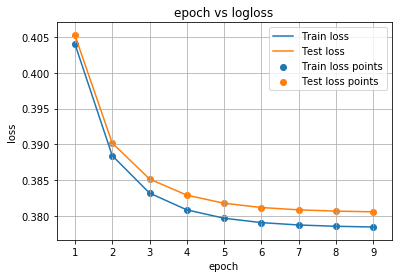

In [15]:

#plotting train and test loss for each epoch 



epoch=range(1,epoch_value)

plt.plot(epoch,logloss_train,label='Train loss') 
plt.plot(epoch,logloss_test,label='Test loss')
plt.scatter(epoch,logloss_train,label='Train loss points')
plt.scatter(epoch,logloss_test,label='Test loss points')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("epoch vs logloss")
plt.grid()
plt.show()

In [16]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[ 2.88760591e-03, -2.64101153e-03,  1.81993914e-03,
          3.70089221e-03, -1.80439371e-03,  6.69868258e-03,
          7.84360873e-03, -4.66377145e-03,  1.97549277e-03,
         -9.03285636e-04,  2.25676294e-04, -6.58648453e-05,
          8.37650636e-03, -3.96298230e-03,  6.79579750e-03]]),
 array([-0.00051846]))

In [17]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9526133333333333
0.95128
